#    Retail Sales Prediction Project
### End-to-End Machine Learning Deployment


##  Overview  
This project follows a complete **ML pipeline** from data preprocessing to model training and deployment using Flask & Docker.  

###  Steps Covered:  
1️⃣ Data Cleaning & Exploration  
2️⃣ Model Training & Evaluation  
3️⃣ Save the Model (`.pkl` file)  
4️⃣ Build a Flask API for Predictions  
5️⃣ Deploy using Docker   


In [21]:

#  Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


##  Load & Explore Dataset

In [22]:

# Load Dataset
file_path = r"C:\Users\dell\Desktop\datasets\Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(file_path)

# Show dataset info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


(None,
    YEAR  MONTH                           SUPPLIER ITEM CODE  \
 0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
 1  2020      1                          PWSWN INC    100024   
 2  2020      1            RELIABLE CHURCHILL LLLP      1001   
 3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
 4  2020      1               DIONYSOS IMPORTS INC    100293   
 
                       ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
 0                  BOOTLEG RED - 750ML      WINE          0.00   
 1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
 2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
 3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
 4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   
 
    RETAIL TRANSFERS  WAREHOUSE SALES  
 0               0.0              2.0  
 1               1.0              4.0  
 2               0.0              1.0  
 3               0.0              1.0  
 4 

##  Data Cleaning

In [25]:

# Handling Missing Values
df["SUPPLIER"] = df["SUPPLIER"].fillna("UNKNOWN_SUPPLIER")
df["ITEM TYPE"] = df["ITEM TYPE"].fillna("UNKNOWN_TYPE")
df["RETAIL SALES"] = df["RETAIL SALES"].fillna(df["RETAIL SALES"].median())


##  Exploratory Data Analysis (EDA)

c:\Users\dell\anaconda3\envs\p_profile_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\anaconda3\envs\p_profile_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dell\anaconda3\envs\p_profile_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


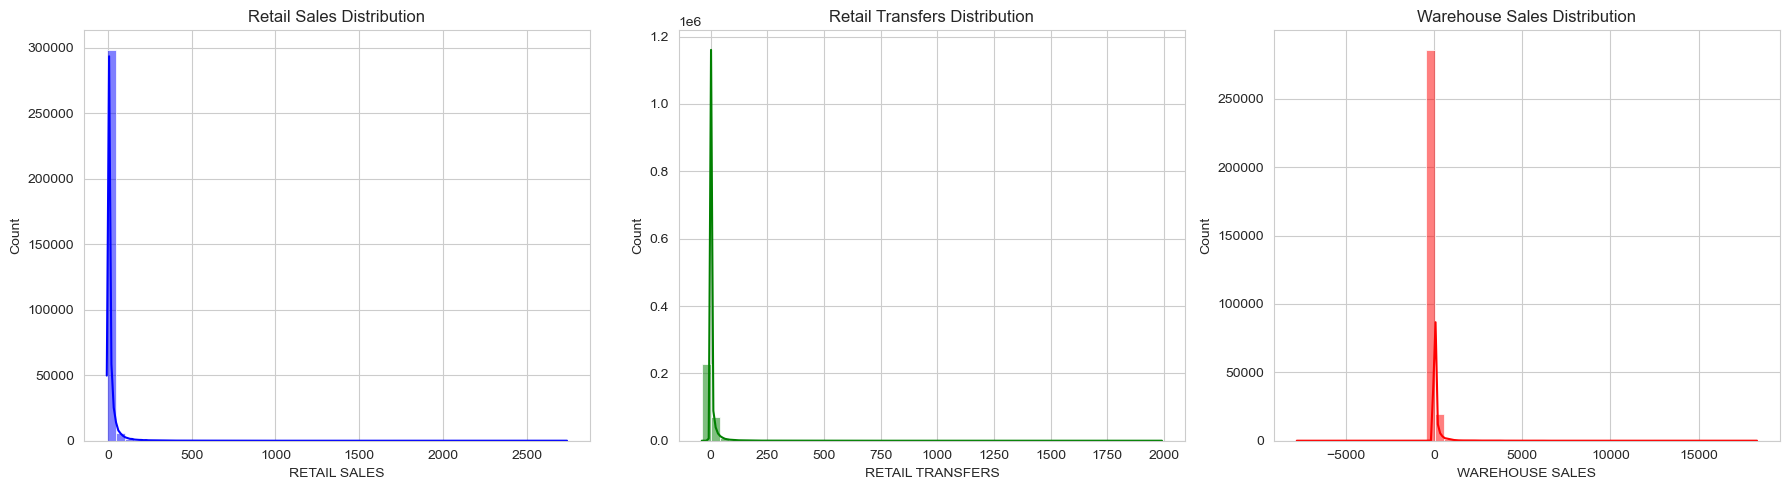

In [26]:

# Plot sales distributions
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["RETAIL SALES"], bins=50, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Retail Sales Distribution")

sns.histplot(df["RETAIL TRANSFERS"], bins=50, kde=True, ax=axes[1], color="green")
axes[1].set_title("Retail Transfers Distribution")

sns.histplot(df["WAREHOUSE SALES"], bins=50, kde=True, ax=axes[2], color="red")
axes[2].set_title("Warehouse Sales Distribution")

plt.tight_layout()
plt.show()


##  Feature Engineering & Model Training

In [27]:

# Feature Selection
features = ["YEAR", "MONTH", "SUPPLIER", "ITEM TYPE", "RETAIL TRANSFERS", "WAREHOUSE SALES"]
target = "RETAIL SALES"

# Encode categorical features
label_encoders = {}
for col in ["SUPPLIER", "ITEM TYPE"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Train-Test Split (10% for training due to memory constraints)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, mse_lr, r2_lr


(1.7033650166104286, 79.42348606799723, 0.9194788541010481)

##  Save Model for Deployment

In [28]:

# Save the trained model as a pickle file
model_filename = "retail_sales_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(lr_model, file)

print(f"Model saved as {model_filename}")


Model saved as retail_sales_model.pkl


##  Flask API for Model Deployment

In [29]:
'''

from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load Model
with open("retail_sales_model.pkl", "rb") as file:
    model = pickle.load(file)

# Initialize Flask App
app = Flask(__name__)

@app.route("/")
def home():
    return "Retail Sales Prediction API is Running!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    features = np.array([
        data["YEAR"], data["MONTH"], data["SUPPLIER"], 
        data["ITEM TYPE"], data["RETAIL TRANSFERS"], data["WAREHOUSE SALES"]
    ]).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"predicted_retail_sales": round(prediction, 2)})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)

'''

'\n\nfrom flask import Flask, request, jsonify\nimport pickle\nimport numpy as np\n\n# Load Model\nwith open("retail_sales_model.pkl", "rb") as file:\n    model = pickle.load(file)\n\n# Initialize Flask App\napp = Flask(__name__)\n\n@app.route("/")\ndef home():\n    return "Retail Sales Prediction API is Running!"\n\n@app.route("/predict", methods=["POST"])\ndef predict():\n    data = request.get_json()\n    features = np.array([\n        data["YEAR"], data["MONTH"], data["SUPPLIER"], \n        data["ITEM TYPE"], data["RETAIL TRANSFERS"], data["WAREHOUSE SALES"]\n    ]).reshape(1, -1)\n    prediction = model.predict(features)[0]\n    return jsonify({"predicted_retail_sales": round(prediction, 2)})\n\nif __name__ == "__main__":\n    app.run(host="0.0.0.0", port=5000, debug=True)\n\n'

##  Dockerize Flask API

In [30]:
'''

# Use Python base image
FROM python:3.9

# Set working directory
WORKDIR /app

# Copy files to container
COPY . /app

# Install dependencies
RUN pip install flask numpy pandas scikit-learn

# Expose port
EXPOSE 5000

# Run Flask app
CMD ["python", "app.py"]

'''

'\n\n# Use Python base image\nFROM python:3.9\n\n# Set working directory\nWORKDIR /app\n\n# Copy files to container\nCOPY . /app\n\n# Install dependencies\nRUN pip install flask numpy pandas scikit-learn\n\n# Expose port\nEXPOSE 5000\n\n# Run Flask app\nCMD ["python", "app.py"]\n\n'